In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import sympy as sp
import scipy


warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# 1. Линейная алгебра

## 1.1.

In [8]:
A_arr = np.array([[2, -4],[3, 5], [-1, 0]])
B_arr = np.array([[1, 2, 7],[-3, -4, 0], [5, 2, 1]])
C_arr = np.array([[6, -3, 9],[4, -5, 2], [8, 1, 5]])

A_T = sp.Matrix(A_arr.T)
B_T = sp.Matrix(B_arr.T)
C = sp.Matrix(C_arr)

result_x = A_T * C - 2 * A_T * B_T 
result_x


Matrix([
[ 14, 14, -11],
[-16,  3,  -6]])

## 1.2.

In [14]:
from scipy.linalg import solve
from scipy.integrate import quad
from scipy import integrate
from sympy.abc import x, y, z, v

In [17]:
from sympy.solvers.solveset import linsolve

X_arr_1 = np.array([[x, 2, 3],[-1, y, 4]])
X_arr_2 = np.array([[1, 2, -5],[2, -6, z]])
Y_arr_1 = np.array([[8, v, -1],[1, 6, 4]])

X_1 = sp.Matrix(X_arr_1)
X_2 = sp.Matrix(X_arr_2)
Y_1 = sp.Matrix(Y_arr_1)

X_1 = 3 * X_1
X_2 = 2 * X_2

result_2 = linsolve([ X_1[0] + X_2[0] - Y_1[0], X_1[1] + X_2[1] - Y_1[1], X_1[4] + X_2[4] - Y_1[4], X_1[5] + X_2[5] - Y_1[5]], (x, y, v, z))
for rs in result_2:
    print(f"x = {rs[0]}")
    print(f"y = {rs[1]}")
    print(f"v = {rs[2]}")
    print(f"z = {rs[3]}")

x = 2
y = 6
v = 10
z = -4


## 1.3.

In [21]:
from sympy.abc import p, q

In [23]:
A_arr = np.array([[1, 2, 3],[3, 6, p], [5, 10, q]])
A_mtx = sp.Matrix(A_arr)

A_mtx = sp.Matrix(A_mtx)

A_1_1 = A_mtx[4] * A_mtx[8] - A_mtx[7] * A_mtx[5]
A_1_2 = A_mtx[3] * A_mtx[8] - A_mtx[5] * A_mtx[6]

A_2_1 = A_mtx[3] * A_mtx[8] - A_mtx[5] * A_mtx[6]
A_2_2 = A_mtx[0] * A_mtx[8] - A_mtx[2] * A_mtx[6]

A_3_1 = A_mtx[1] * A_mtx[5] - A_mtx[2] * A_mtx[4]
A_3_2 = A_mtx[0] * A_mtx[5] - A_mtx[2] * A_mtx[3]


result_3 = linsolve([ A_1_1 , A_1_2, A_2_1, A_2_2, A_3_1, A_3_2 ], (p, q))
for rs in result_3:
    print(f"p = {rs[0]}")
    print(f"q = {rs[1]}")
   

p = 9
q = 15


## 1.4.

In [28]:
A_One_arr = np.array([[2, -5]]).T
A_Two_arr = np.array([[-1, 3]]).T
X_R_arr = np.array([[1, -4]]).T


A_One_mtx = sp.Matrix(A_One_arr)
B_Two_mtx = sp.Matrix(A_Two_arr)
X_R_mtx = sp.Matrix(X_R_arr)

A_С_1_1 = A_One_mtx[0] * B_Two_mtx[1] - A_One_mtx[1] * B_Two_mtx[0]
if A_С_1_1 > 0:
    print("вектора линенейно независимы")
else:
    print("вектора линенейно зависимы")

transform = np.insert (A_One_arr, 1 , A_Two_arr.T, axis= 1 )
transform_mtx = sp.Matrix(transform)

вектора линенейно независимы


#### п. 1.4. а)

In [30]:
#transform_mtx - матрица преобразования между разными базисами
# вычисляем обратную матрицу для преобразования координат вектора из старого базиса в новый
#inverse_transform = np.linalg.inv(transform) 
#inverse_transform_mtx = sp.Matrix(inverse_transform)
#inverse_transform_mtx

#new_basis = inverse_transform_mtx * X_R_mtx
#print(f"координата x = {int(new_basis[0])} в новом базисе")
#print(f"координата y = {int(new_basis[1])} в новом базисе")


#### п. 1.4. б)

In [31]:
#Y_R_arr = np.array([[1, 1]]).T

#Y_new_basis_mtx = sp.Matrix(Y_R_arr)

#old_basis = transform * Y_new_basis_mtx

#print(f"координата x = {int(old_basis[0])} в старом базисе")
#print(f"координата y = {int(old_basis[1])} в старом базисе")

## 1.5.

In [115]:
import numpy as np
import matplotlib.pyplot as plt

my_array = np.random.randint(1000, size=(100, 100))

my_array.shape

matrix =  np.linalg.svd(my_array, full_matrices=True)
U = matrix[0]
S = matrix[1]
V_T = matrix[2].T

d_arr = {}
for r in range(2, 100):
    
    A_mtx_1 = U[:, :r] 

#V_T.shape
    A_mtx_2 = S[:r] 
    A_mtx_3 = V_T[:r, :]

    A_mtx = A_mtx_1 * A_mtx_2 *  A_mtx_3.T
    #print(f"{A_mtx.shape}")
    d_arr[r] = A_mtx 

#len(d_arr)




#A_mtx_3
#plt.hist(U);

In [126]:
def deffirent_values(source_matx, new_matx):
    curr_val_e = 0
    for i, row in enumerate(new_matx):
        print(f" row {row}")
        for j, value in enumerate(row):
            print(f" value {value}")
            print(f" 2 value {source_matx[i][j]}")
            print(f" 3 value {new_matx[i][j]}")
            curr_val_e += (source_matx[i][j] - new_matx[i][j])**2
            print(f" curr_val_e {curr_val_e}")

    return curr_val_e
    

In [127]:
arr_diff_values_matx = {}
for r_key in d_arr:
    print((d_arr[r_key]).shape)
    diff_value = deffirent_values(my_array, d_arr[r_key])
    arr_diff_values_matx[r_key] = diff_value

len(arr_diff_values_matx)

(100, 2)
 row [443.09770031  27.59400797]
 value 443.09770031090943
 2 value 292
 3 value 443.09770031090943
 curr_val_e 22830.5150392454
 value 27.594007970831264
 2 value 721
 3 value 27.594007970831264
 curr_val_e 503642.38482120103
 row [160.85107802 -14.40283887]
 value 160.85107801991973
 2 value 872
 3 value 160.85107801991973
 curr_val_e 1009375.1740546315
 value -14.402838870515355
 2 value 115
 3 value -14.402838870515355
 curr_val_e 1026120.26876238
 row [-419.66000584  -15.47747658]
 value -419.6600058382298
 2 value 844
 3 value -419.6600058382298
 curr_val_e 2622956.879117455
 value -15.477476579270729
 2 value 414
 3 value -15.477476579270729
 curr_val_e 2807407.782006353
 row [ 384.82706689 -104.12799646]
 value 384.82706689333304
 2 value 50
 3 value 384.82706689333304
 curr_val_e 2919516.9467307455
 value -104.12799645755258
 2 value 588
 3 value -104.12799645755258
 curr_val_e 3398558.1102110916
 row [ 0.90166742 11.74046647]
 value 0.9016674150290378
 2 value 775
 3

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



 row [-2.06671804e+02 -7.15302491e+01 -1.11373024e-01 -3.53327403e+01
 -1.02899210e+01 -1.48792943e+01  3.01383472e+01 -1.04580269e+02
  2.72683103e+01  3.49510295e-01  3.96328086e+01 -5.56327862e+01
  4.08250491e+01  1.13617943e+01 -5.95482631e+01 -4.31217159e+00
  2.36285746e+01 -5.26789326e+00 -5.44435952e+00 -1.26185550e+01
  9.14487038e+00 -1.24432010e+01  8.57215188e+00 -1.20427082e+01
 -1.24298172e+01 -2.40598571e+01 -9.36467799e-01  6.63045064e-01
 -5.34859180e+00  7.57489229e-02 -2.18462703e+01  3.57474328e-02
  7.47465371e-01  1.43956022e+01 -9.72751947e+00  2.25697548e-02
  3.52792112e+00 -2.68625681e+01  7.56795872e+00 -3.60865161e-01
  4.04496131e+01 -4.13397667e+01  5.99653694e+00  2.11395554e+00
  6.15179872e+00  1.37147392e+01 -7.56359470e+00 -2.15839443e+01
  3.03938779e+01  8.56390911e-01  9.15022885e+00  1.23001803e+01
 -1.64472221e+01  2.18661307e+00 -1.06547602e+00  3.15670110e+00
 -3.00482841e+00 -3.56493772e+00 -1.29052132e+01]
 value -206.67180376642904
 2 value

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




 3 value -1.862799369667019
 curr_val_e 426345651.73471254
 value -36.0593332751403
 2 value 17
 3 value -36.0593332751403
 curr_val_e 426348467.0275601
 value -35.71597244032077
 2 value 231
 3 value -35.71597244032077
 curr_val_e 426419604.4375149
 value 0.8306502302112839
 2 value 737
 3 value 0.8306502302112839
 curr_val_e 426961549.7490554
 value -57.32624140068471
 2 value 171
 3 value -57.32624140068471
 curr_val_e 427013682.62156755
 value 54.4709937628782
 2 value 580
 3 value 54.4709937628782
 curr_val_e 427289863.3579641
 value 3.7422767555334566
 2 value 194
 3 value 3.7422767555334566
 curr_val_e 427326061.35921824
 value -10.885500426539286
 2 value 280
 3 value -10.885500426539286
 curr_val_e 427410675.73357666
 value 11.963908512666988
 2 value 8
 3 value 11.963908512666988
 curr_val_e 427410691.4461473
 value 16.47766975158711
 2 value 139
 3 value 16.47766975158711
 curr_val_e 427425703.1675568
 value 5.7466557328094945
 2 value 326
 3 value 5.7466557328094945
 curr_

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



98

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

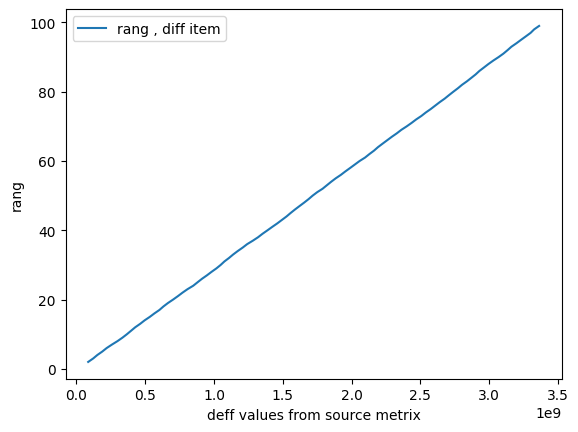

In [139]:
import matplotlib.pyplot as plt

#plt.plot(arr_diff_values_matx[0], arr_diff_values_matx[1])

plt.plot( arr_diff_values_matx.values(), arr_diff_values_matx.keys(), label='rang , diff item')

# Вставьте свой код здесь
plt.xlabel("deff values from source metrix")
plt.ylabel("rang")
# Вставьте свой код здесь
plt.legend()
# Вставьте свой код здесь
#plt.ylim(-5, 5)

# 2. Начала мат. анализа и оптимизации

## Вторая часть в карти